## Quel(s) impact(s) a(ont) eu le(s) confinement(s) sur l'affluence de Twitch ?

In [102]:
import pandas as pd
import seaborn as sb
#import matplotlib as mpl
#import numpy as np

import warnings
warnings.filterwarnings('ignore')

#import csv
df=pd.read_csv(r'.\Twitch_game_data.csv',encoding='cp1252')

In [88]:
df

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87


##### Le Dataset presente le top 200 des meilleurs jeux qui ont été stream par mois du 1er janvier au 31 décembre 2021. Le problème que cela peut présenter est la grande quantité de données que cela donne, car j'ai l'evolution de 200 jeux par mois pendant 6 ans.

In [89]:
rank=df.query("Rank == 1")

In [90]:
rank

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
200,1,League of Legends,2,2016,93154772,1266715 hours,475784,2712,117996,134035,1822,73.54
400,1,League of Legends,3,2016,94514511,1264029 hours,599114,2585,117734,127206,1701,74.77
600,1,League of Legends,4,2016,88389049,1217250 hours,553165,2945,113251,122933,1692,72.61
800,1,League of Legends,5,2016,80679320,1196096 hours,433005,2635,118593,108585,1609,67.45
...,...,...,...,...,...,...,...,...,...,...,...,...
13400,1,Just Chatting,8,2021,249610555,3255305 hours,736910,6517,428053,335949,4381,76.68
13600,1,Just Chatting,9,2021,222594651,2982598 hours,773047,8506,394043,309589,4148,74.63
13800,1,Just Chatting,10,2021,217994303,2945069 hours,715797,6420,376011,293397,3963,74.02
14000,1,Just Chatting,11,2021,231514981,2828547 hours,878286,6493,368108,321995,3934,81.85


J'ai fait une extraction du meilleur jeu par mois durant ces six années et je vais les comparer les uns aux autres sur la moyenne de spectateurs, le nombre d'heures de visionnages, et la moyenne de chaines par mois en fonction de l'année et voir les évolutions.

<AxesSubplot: xlabel='Year', ylabel='Avg_viewers'>

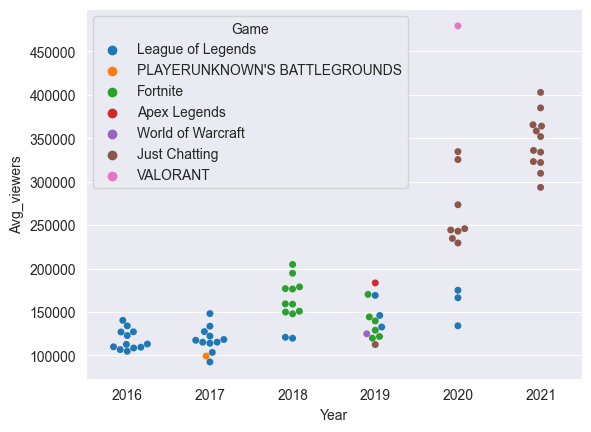

In [117]:
sb.swarmplot(data=rank, x='Year', y="Avg_viewers", hue="Game")

<AxesSubplot: xlabel='Year', ylabel='Hours_watched'>

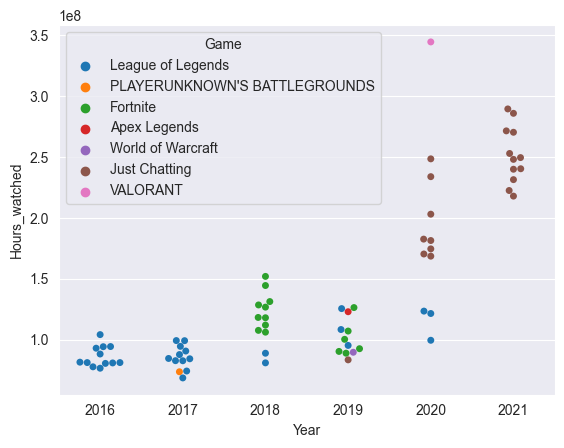

In [118]:
sb.swarmplot(data=rank, x='Year', y="Hours_watched", hue="Game")

<AxesSubplot: xlabel='Year', ylabel='Avg_channels'>

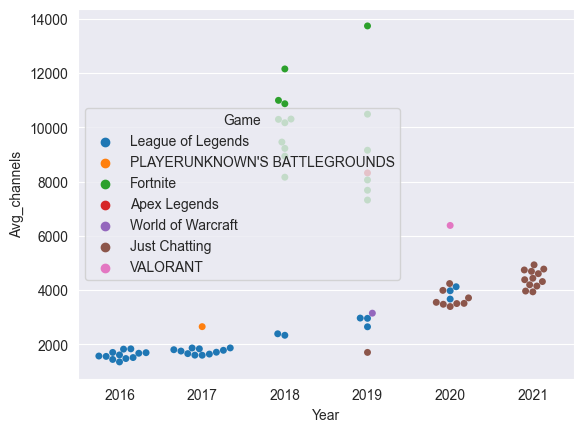

In [120]:
sb.swarmplot(data=rank, x='Year', y="Avg_channels", hue="Game")

### En prêtant attention aux différents graphiques, on remarque que sur ces 6 années 3 jeux se démarquent beaucoup : League of Legends qui est <<numéro 1>> de 2016 à 2020, Fortnite qui a pris de l'ampleur en 2018, mais la "folie" s'est arrêtée en 2020, et Just Chatting, qui en 2019 devient un jeu sur twitch et qui a explosé en 2020 avec les confinements et l'envie de beaucoup de monde de trouver de la compagnie durant ces moments de solitude et d'isolement.

#### Je vais commencer par analyser l'evolution de League of Legends sur la periode 2016 -> 2021

In [128]:
lol=df.query("Game=='League of Legends'")

In [137]:
lol_2016=lol.query("Year==2016")
lol_2017=lol.query("Year==2017")
lol_2018=lol.query("Year==2018")
lol_2019=lol.query("Year==2019")
lol_2020=lol.query("Year==2020")
lol_2021=lol.query("Year==2021")

<AxesSubplot: xlabel='Month', ylabel='Avg_viewers'>

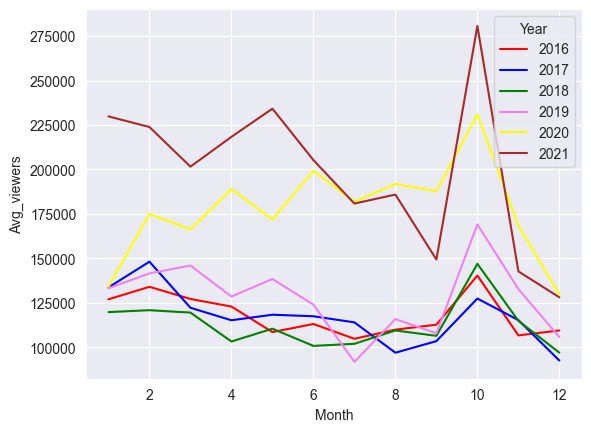

In [145]:
sb.lineplot(data=lol_2016, x='Month', y="Avg_viewers", hue="Year", palette=['r']),
sb.lineplot(data=lol_2017, x='Month', y="Avg_viewers", hue="Year", palette=['b']),
sb.lineplot(data=lol_2018, x='Month', y="Avg_viewers", hue="Year", palette=['g']),
sb.lineplot(data=lol_2019, x='Month', y="Avg_viewers", hue="Year", palette=['violet']),
sb.lineplot(data=lol_2020, x='Month', y="Avg_viewers", hue="Year", palette=['yellow']),
sb.lineplot(data=lol_2021, x='Month', y="Avg_viewers", hue="Year", palette=['brown'])

<AxesSubplot: xlabel='Month', ylabel='Avg_channels'>

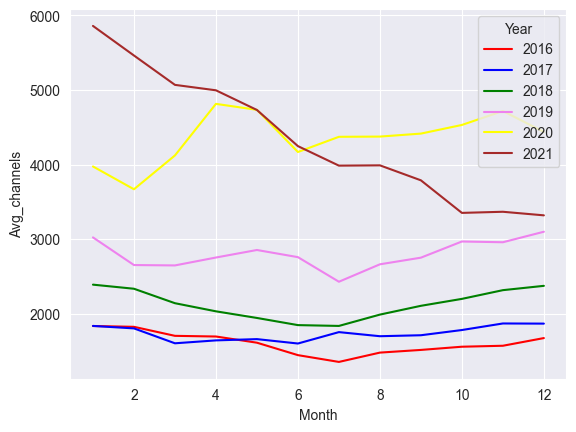

In [146]:
sb.lineplot(data=lol_2016, x='Month', y="Avg_channels", hue="Year", palette=['r']),
sb.lineplot(data=lol_2017, x='Month', y="Avg_channels", hue="Year", palette=['b']),
sb.lineplot(data=lol_2018, x='Month', y="Avg_channels", hue="Year", palette=['g']),
sb.lineplot(data=lol_2019, x='Month', y="Avg_channels", hue="Year", palette=['violet']),
sb.lineplot(data=lol_2020, x='Month', y="Avg_channels", hue="Year", palette=['yellow']),
sb.lineplot(data=lol_2021, x='Month', y="Avg_channels", hue="Year", palette=['brown'])

<AxesSubplot: xlabel='Month', ylabel='Hours_watched'>

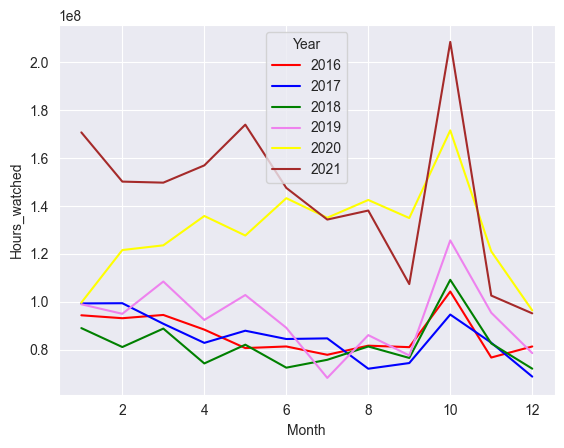

In [147]:
sb.lineplot(data=lol_2016, x='Month', y="Hours_watched", hue="Year", palette=['r']),
sb.lineplot(data=lol_2017, x='Month', y="Hours_watched", hue="Year", palette=['b']),
sb.lineplot(data=lol_2018, x='Month', y="Hours_watched", hue="Year", palette=['g']),
sb.lineplot(data=lol_2019, x='Month', y="Hours_watched", hue="Year", palette=['violet']),
sb.lineplot(data=lol_2020, x='Month', y="Hours_watched", hue="Year", palette=['yellow']),
sb.lineplot(data=lol_2021, x='Month', y="Hours_watched", hue="Year", palette=['brown'])

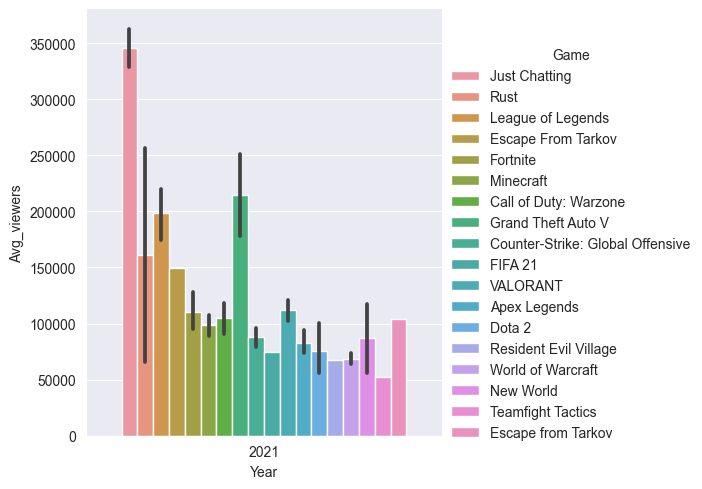

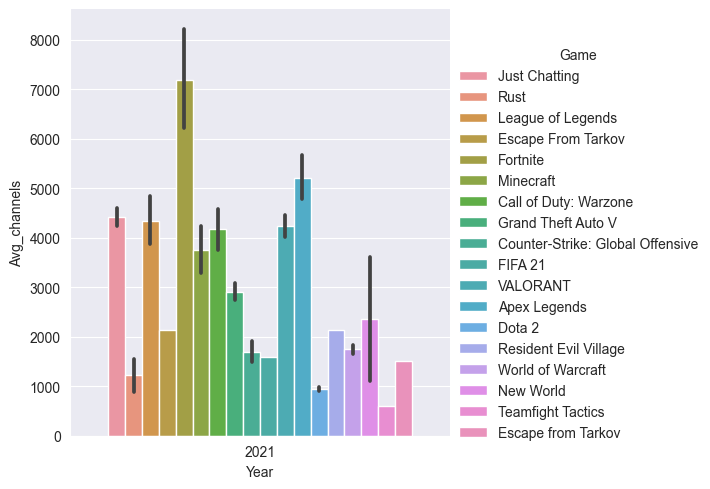

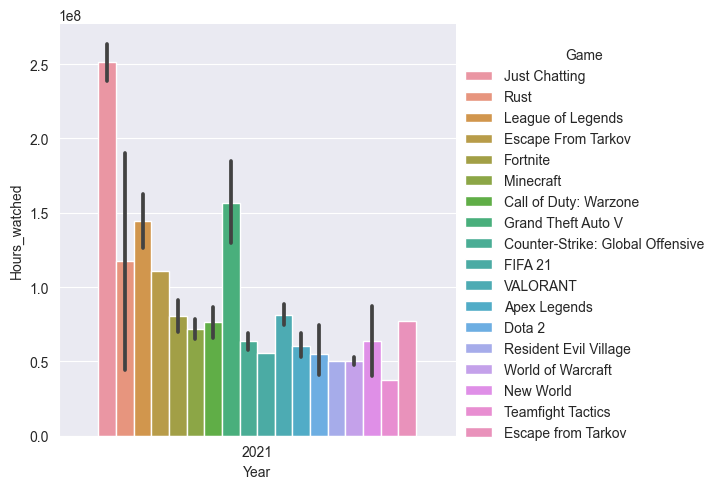

In [173]:
sb.catplot(data=df.query("Year==2021 and Rank <= 10"), x="Year", y='Avg_viewers', kind="bar", hue="Game"), sb.catplot(data=df.query("Year==2021 and Rank <= 10"), x="Year", y='Avg_channels', kind="bar", hue="Game")

sb.catplot(data=df.query("Year==2021 and Rank <= 10"), x="Year", y='Hours_watched', kind="bar", hue="Game")

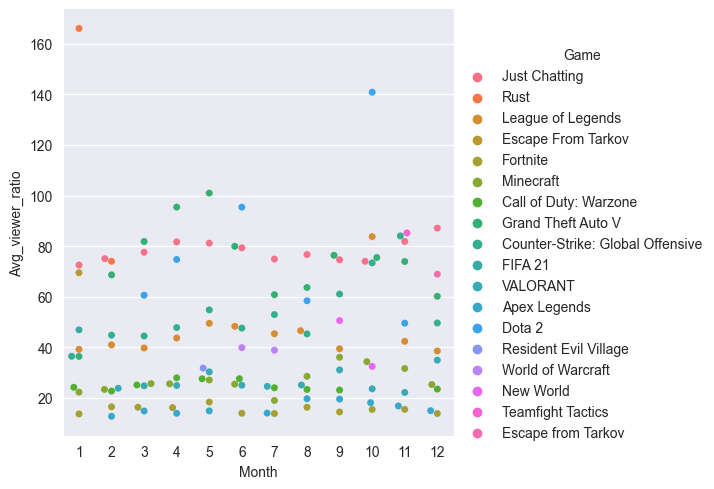

In [172]:
sb.catplot(data=df.query("Year==2021 and Rank <= 10"), x="Month", y='Avg_viewer_ratio', hue="Game",kind="swarm")

In [175]:
df.query("Year==2021 and Rank <= 10").describe()

,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,120.000000,120.000000,120.0,1.200000e+02,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.500000,6.500000,2021.0,1.051655e+08,6.744384e+05,9285.366667,255205.741667,144287.150000,3806.608333,45.025667
std,2.884324,3.466527,0.0,6.431011e+07,4.722738e+05,11573.884360,146569.542330,88115.820362,1843.529850,27.997931
min,1.000000,1.000000,2021.0,3.707319e+07,1.123290e+05,1107.000000,31292.000000,51562.000000,608.000000,12.750000
25%,3.000000,3.750000,2021.0,6.059267e+07,3.703942e+05,5504.750000,148213.750000,81901.750000,2454.500000,23.602500
50%,5.500000,6.500000,2021.0,8.001940e+07,5.704180e+05,7075.000000,227127.000000,109137.000000,3957.500000,38.735000
75%,8.000000,9.250000,2021.0,1.350063e+08,8.412658e+05,9106.000000,350170.250000,181704.000000,4757.250000,68.710000
max,10.000000,12.000000,2021.0,2.895479e+08,3.082772e+06,88824.000000,703686.000000,402709.000000,9955.000000,166.050000
